In [65]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

from numpy.linalg import norm
from math import sqrt

**Huge diffusion file in a google disk**

In [66]:
def make_df_get_Dt(path, N):
    df = pd.read_csv(path, skiprows=[0,1, 2])

    with open(path) as f:
        f.readline()
        line = f.readline()

    Dt = float(line.split(':')[-1][:-1])    # шаг по времени для соседних строчек в диффузии

    return df, Dt

In [73]:
path1 = './graphs/diff_N100_t50_interval10dt.csv'
path2 = 'graphs/diff_N_100_dt0_00025.csv'
N = 100

df1, Dt1 = make_df_get_Dt(path=path1, N=N)
df2, Dt2 = make_df_get_Dt(path=path2, N=N)

In [75]:
def calculate_all_means(number_of_steps, df, Dt):
    '''
    Возвращает массив из усредненного по всем перемещениям для каждой частицы и затем по всем частиц из перемещений для разных времен перемещения
    и массив отрезков времени для которых как раз получено значение перемещения.
    df: pd.Dataframe
    Dt: расстояние по времени между двумя соседними строчками в датафрейме
    '''
    steps = [step for step in range(0, number_of_steps + 1, 10)]

    all_means = []
    for step in steps:
        part_dict = {}
        for i in range(N):
            part_dict[i] = np.array([])
        
        for row_numb in steps:
            for p_numb in range(N):
                row = df.iloc[row_numb]
                x = row[str(p_numb) + 'x']
                y = row[str(p_numb) + 'y']
                z = row[str(p_numb) + 'z']
                pos = np.array([x, y, z])

                row_next = df.iloc[row_numb + step]     # берем для той же частицы с шагом step ряд
                x_next = row_next[str(p_numb) + 'x']
                y_next = row_next[str(p_numb) + 'y']
                z_next = row_next[str(p_numb) + 'z']
                pos_next = np.array([x_next, y_next, z_next])
                
                s_square = norm(pos_next - pos) ** 2
                # s_square = (x_next - x) ** 2 + (y_next - y) ** 2 + (z_next - z) ** 2
                # print(s_square)
                part_dict[p_numb] = np.append(part_dict[p_numb], s_square)

        mean_dict = {}
        for i in range(N):
            mean_dict[i] = part_dict[i].mean()

        total_mean_for_step = np.array(list(mean_dict.values())).mean()

        all_means.append(total_mean_for_step)

    return all_means, Dt * np.array(steps)
    

In [85]:
all_means1, dt_of_steps1 = calculate_all_means(1000, df=df1, Dt=Dt1)

In [86]:
all_means2, dt_of_steps2 = calculate_all_means(1000, df=df2, Dt=Dt2)

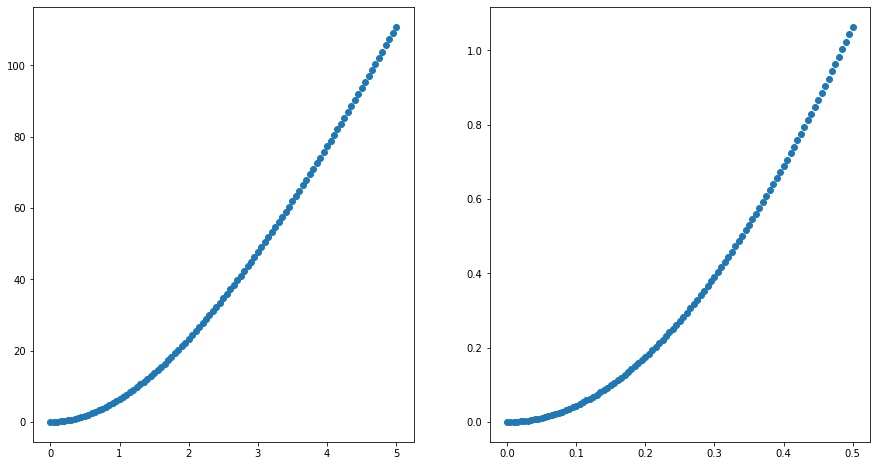

In [87]:
sp = None
plt.figure(figsize=(15, 8))

sp = plt.subplot(1, 2, 1)
plt.scatter(dt_of_steps1, all_means1)
sp = plt.subplot(1, 2, 2)
plt.scatter(dt_of_steps2, all_means2)

plt.show()

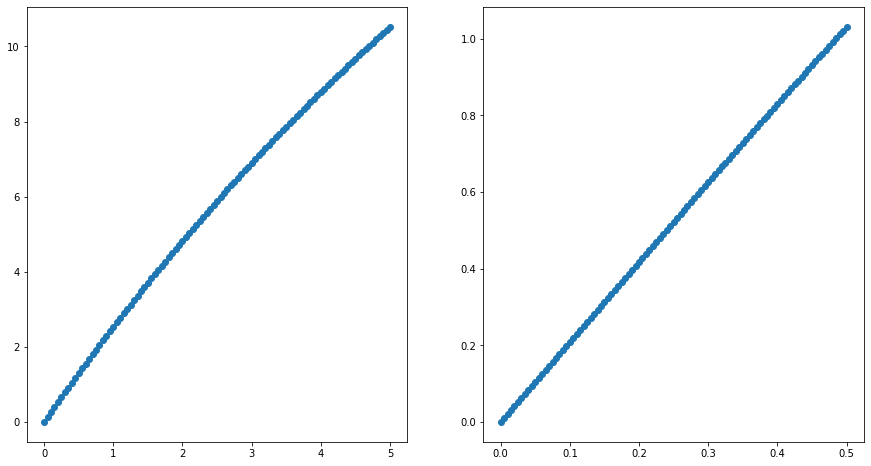

In [88]:
sp = None
plt.figure(figsize=(15, 8))

sp = plt.subplot(1, 2, 1)
plt.scatter(dt_of_steps1, np.sqrt(all_means1))
sp = plt.subplot(1, 2, 2)
plt.scatter(dt_of_steps2, np.sqrt(all_means2))

plt.show()